In [1]:
import json
with open("all_text_tokens_dict2.json", encoding='utf-8') as f:
    all_text_tokens = json.load(f)

In [3]:
texts = list(all_text_tokens.values())


In [5]:
import os

# 文件夹路径
folder_path = 'corpus318'

file_folder_mapping = {}
file_list=[]

# 遍历文件夹中的文件和文件夹
for root, dirs, files in os.walk(folder_path):
    for file_name in files:
        # 只处理.txt文件
        if file_name.endswith('.txt'):
            # 使用文件名作为键，文件夹名作为值
            file_folder_mapping[file_name[:-4]] = os.path.basename(root)
            file_list.append(file_name[:-4])

print(len(file_folder_mapping))
print(len(file_list))

318
318


In [7]:
from collections import Counter
from itertools import chain

# === Assume `texts` is a list of token lists ===
# Example: texts = [['我', '是'], ['他', '也', '是'], ...]

# === Step 0: Define stoplist ===
stoplist = set([
    
])

# Step 1: Document frequency counter
doc_freq = Counter()
for tokens in texts:
    doc_freq.update(set(tokens))

# Step 2: Global term frequency
flat_tokens = list(chain.from_iterable(texts))
word_counts = Counter(flat_tokens)

# Step 3: Filter by document frequency and stoplist
filtered_word_counts = {
    word: freq for word, freq in word_counts.items()
    if doc_freq[word] >= 3 and word not in stoplist
}

# Step 4: Get top-N words for vocab
N = 300
top_N = sorted(filtered_word_counts.items(), key=lambda x: x[1], reverse=True)[:N]
vocab = [word for word, _ in top_N]

# Step 5: Print results
for i, (word, freq) in enumerate(top_N, 1):
    print(f"{i:>3}. {word:<10} — {freq} times")


  1. 之          — 122877 times
  2. 的          — 58296 times
  3. 一          — 52050 times
  4. 不          — 49280 times
  5. 我          — 46141 times
  6. 人          — 45220 times
  7. 而          — 41380 times
  8. 了          — 40477 times
  9. 為          — 38994 times
 10. 曰          — 38973 times
 11. 有          — 38694 times
 12. 其          — 38612 times
 13. 余          — 37079 times
 14. 以          — 36709 times
 15. 此          — 35920 times
 16. 也          — 30737 times
 17. 者          — 27446 times
 18. 是          — 26702 times
 19. 吾          — 26607 times
 20. 亦          — 25556 times
 21. 見          — 24415 times
 22. 中          — 24228 times
 23. 於          — 23538 times
 24. 他          — 23380 times
 25. 已          — 21412 times
 26. 道          — 21045 times
 27. 來          — 20113 times
 28. 無          — 19800 times
 29. 所          — 19450 times
 30. 至          — 19083 times
 31. 在          — 19043 times
 32. 你          — 18830 times
 33. 則          — 18108 times
 34. 得   

In [11]:
import pandas as pd

# Initialize matrix rows
vectors = []

for tokens in texts:
    token_count = len(tokens)
    counter = Counter(tokens)
    vector = [counter[word] / token_count if token_count > 0 else 0 for word in vocab]
    vectors.append(vector)

# Create DataFrame
df_vectors = pd.DataFrame(vectors, columns=vocab)



In [12]:


df_meta = pd.DataFrame({
    "filename": file_list,
    "folder": [file_folder_mapping.get(fn, "unknown") for fn in file_list]
})


In [43]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.0000015)
df_reduced = selector.fit_transform(df_vectors)


In [45]:


# Get mask of kept features
mask = selector.get_support()

# Apply to column names
retained_features = df_vectors.columns[mask]

# Optionally convert back to DataFrame
df_reduced_df = pd.DataFrame(df_reduced, columns=retained_features)


In [47]:
# Get mask of retained features (True = kept)
mask = selector.get_support()

# All feature names from original DataFrame
all_features = df_vectors.columns

# Get removed features
removed_features = all_features[~mask]

# Print removed features
print(f"❌ {len(removed_features)} features were removed (low variance ≤ 0.00001):\n")
for feature in removed_features:
    print(feature)


❌ 157 features were removed (low variance ≤ 0.00001):

不能
同
前
語
聽
過
地
雖
立
尚
或
幾
處
向
起
似
更
蓋
惟
耳
多
再
但
問
手
力
意
間
從
取
覺
果
卻
衆
說道
諸
先
天
用
此時
好
四
思
勿
狀
被
令
物
身
往
足
走
始
呼
竟
不知
並
請
盡
使
命
開
麼
發
書
成
只
相
告
顧
名
旣
坐
實
回
年
長
觀
進
正
什麼
外
於是
各
久
可以
門
很
待
近
食
面
次
種
安
和
仍
受
少
固
卷
計
遇
約
望
急
願
石
猶
內
頗
沒
做
須
動
直
風
遠
目
話
神
深
難
殊
居
絕
幸
山
鐘
叫
信
恐
頭
笑
高
本
如何
首
均
否
對
老
會
飛
看見
初
兵
定
止
今日
衣
不是
箇
別
最
隨
新


In [49]:
# Get mask of retained features (True = kept)
mask = selector.get_support()

# Get retained feature names
retained_features = df_vectors.columns[mask]

# Print the result
print(f"✅ {len(retained_features)} features were retained (variance > 0.00001):\n")
for feature in retained_features:
    print(feature)


✅ 143 features were retained (variance > 0.00001):

之
的
一
不
我
人
而
了
為
曰
有
其
余
以
此
也
者
是
吾
亦
見
中
於
他
已
道
來
無
所
至
在
你
則
得
乃
即
又
時
與
言
去
可
矣
上
然
大
那
汝
如
事
說
個
且
這
自
日
出
將
行
知
君
能
就
彼
若
二
及
後
何
聞
兩
必
下
欲
爾
要
復
未
都
當
今
死
非
入
等
船
予
甚
便
女
遂
心
三
皆
聲
作
故
把
到
數
我們
還
忽
因
乎
小
舟
耶
想
歸
王
謂
着
既
看
著
裏
極
他們
方
生
視
水
國
馬
記
夫人
沒有
口
家
以為
呢
海
子
島
先生
殺
金
餘
父
兒
由
氏


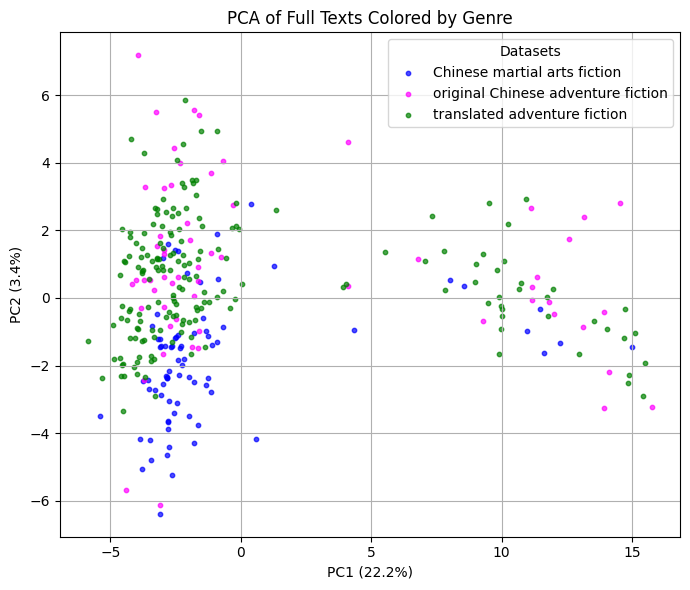

In [51]:
import pandas as pd
from collections import Counter
from itertools import chain
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#
# Optional color mapping
genreColor = {
    'original Chinese adventure fiction': "magenta",
    'translated adventure fiction': "green",
    'Chinese martial arts fiction': "blue"
}
df_meta["color"] = df_meta["folder"].map(genreColor).fillna("gray")

# === STEP 4: Standardize and apply PCA ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_reduced)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# === STEP 5: Plot PCA (no text labels) ===
plt.figure(figsize=(7, 6))

for genre, group in df_meta.groupby("folder"):
    indices = group.index
    plt.scatter(
        X_pca[indices, 0],
        X_pca[indices, 1],
        label=genre,
        color=genreColor.get(genre, "gray"),
        alpha=0.7,
        s=10
    )

plt.title("PCA of Full Texts Colored by Genre")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")

plt.legend(title="Datasets")
plt.grid(True)
plt.tight_layout()
plt.savefig("pca_filtered300_varianceadjusted2.png", dpi=300, bbox_inches='tight')
plt.show()


C:\Users\fring\AppData\Local\Temp\ipykernel_6456\4084960950.py:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


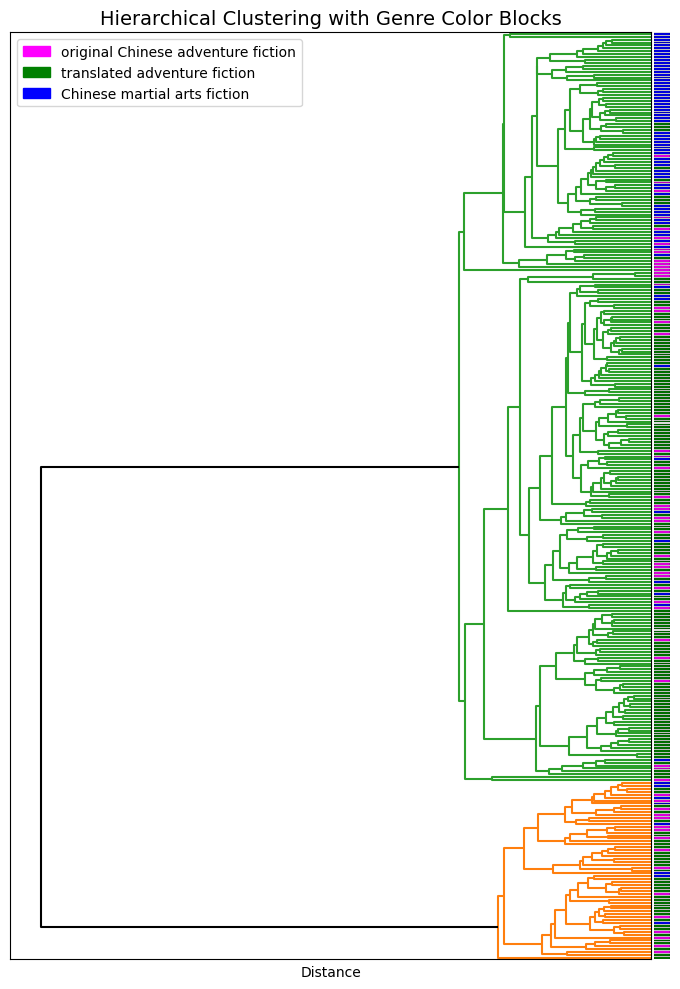

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# === 假设你已有 df_vectors 和 df_meta，其中 df_meta 包含 'filename' 和 'folder' ===

# 1. Genre → color 映射
genre_color_map = {
    "original Chinese adventure fiction": "magenta",
    "translated adventure fiction": "green",
    "Chinese martial arts fiction": "blue"
}
df_meta = df_meta.copy()
df_meta["color"] = df_meta["folder"].map(genre_color_map).fillna("gray")
label_to_color = df_meta.set_index("filename")["color"].to_dict()

# 2. 层次聚类
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_reduced)
Z = linkage(X_scaled, method="ward")

# 3. 画 dendrogram（不显示标签）
fig, ax = plt.subplots(figsize=(8, 10))
max_d = np.max(Z[:, 2])
cutoff = 0.5 * max_d



dendro = dendrogram(
    Z,
    orientation="left",
    labels=None,
    no_labels=True,
    color_threshold=cutoff,       # ← sets colored clusters
    above_threshold_color='black',
    ax=ax
)


for line in ax.get_lines():
    line.set_linewidth(0.8)  # reduce visual weight




# 4. 获取叶子节点顺序与对应颜色
leaf_order = dendro["leaves"]
leaf_filenames = df_meta.iloc[leaf_order]["filename"].tolist()
leaf_colors = [label_to_color.get(name, "gray") for name in leaf_filenames]

# 5. 提取真实的 y 坐标
icoord = dendro["icoord"]
dcoord = dendro["dcoord"]

leaf_y_coords = []
seen = 0
for xs, ys in zip(icoord, dcoord):
    for i, y_val in enumerate(ys):
        if y_val == 0.0:  # 是叶节点
            y_pos = xs[i]
            leaf_y_coords.append(y_pos)
            seen += 1
            if seen >= len(leaf_order):
                break
    if seen >= len(leaf_order):
        break

# 6. 创建 inset_axes 画色块
inset_ax = inset_axes(
    ax, width="2.5%", height="100%", loc="right",
    bbox_to_anchor=(0.03, 0, 1, 1),  # 向右稍偏，避免重叠
    bbox_transform=ax.transAxes,
    borderpad=0
)
inset_ax.set_xlim(0, 1)
inset_ax.set_ylim(ax.get_ylim())
inset_ax.axis('off')

# 7. 绘制彩色方块（确保无 overlap）
block_height = 6.55
for y, color in zip(leaf_y_coords, leaf_colors):
    inset_ax.add_patch(plt.Rectangle(
        (0, y - block_height / 2),
        width=1,
        height=block_height,
        facecolor=color,
        edgecolor='black',
        linewidth=0.2
    ))

# 8. 美化与图例
ax.set_yticks([])
ax.set_xticks([])
ax.set_title("Hierarchical Clustering with Genre Color Blocks", fontsize=14)
ax.set_xlabel("Distance")

legend_patches = [mpatches.Patch(color=c, label=g) for g, c in genre_color_map.items()]
ax.legend(handles=legend_patches, loc="upper left")

plt.tight_layout()
plt.subplots_adjust(right=0.82)
plt.show()
fig.savefig("HCA300_varianceadjusted2.png", dpi=300)

中位位置: {'magenta': 144.0, 'green': 123.5, 'blue': 274.5}


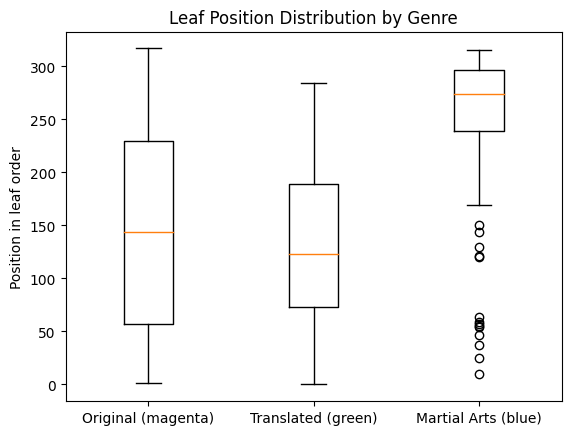

In [57]:
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt

# 1. 获取叶子顺序（leaf_order 是索引）
leaf_order = dendro["leaves"]
leaf_filenames = df_meta.iloc[leaf_order]["filename"].tolist()
leaf_colors = [label_to_color.get(name, "gray") for name in leaf_filenames]

# 2. 获取各颜色在叶子顺序中的位置索引
positions = {"magenta": [], "green": [], "blue": []}

for i, color in enumerate(leaf_colors):
    if color in positions:
        positions[color].append(i)

# 3. 计算各颜色的中位数位置
medians = {color: np.median(pos) for color, pos in positions.items()}
print("中位位置:", medians)

# 4. 可视化分布
plt.boxplot([positions["magenta"], positions["green"], positions["blue"]],
            labels=["Original (magenta)", "Translated (green)", "Martial Arts (blue)"])
plt.ylabel("Position in leaf order")
plt.title("Leaf Position Distribution by Genre")
plt.show()


In [59]:
features = df_vectors.columns[selector.get_support()]
print(len(features))

143


In [61]:
loadings = pd.DataFrame(
    pca.components_.T * 50,       # scale for visualization
    columns=["PC1", "PC2"],
    index=features
)


In [63]:
# Top 10 words most strongly correlated with PC1
print("Top contributors to PC1:")
print(loadings["PC1"].sort_values(ascending=False).head(10))

print("\nTop negative contributors to PC1:")
print(loadings["PC1"].sort_values().head(10))


Top contributors to PC1:
的    8.338870
了    8.303392
要    7.524327
這    7.511418
還    7.395007
是    7.379174
個    7.311283
到    7.233235
他    7.232144
想    6.821965
Name: PC1, dtype: float64

Top negative contributors to PC1:
之   -6.555765
其   -6.548605
以   -6.530846
為   -6.328154
者   -5.953657
而   -5.721641
矣   -5.699411
亦   -5.668089
則   -5.305507
於   -5.218044
Name: PC1, dtype: float64


In [65]:
# Top 10 words most strongly correlated with PC1
print("Top contributors to PC2:")
print(loadings["PC2"].sort_values(ascending=False).head(10))

print("\nTop negative contributors to PC2:")
print(loadings["PC2"].sort_values().head(10))

Top contributors to PC2:
中    9.722083
忽    8.500898
見    8.362594
大    8.255727
舟    8.075903
水    8.001414
船    7.912581
極    7.453761
一    7.392094
小    7.365273
Name: PC2, dtype: float64

Top negative contributors to PC2:
日   -9.308567
金   -9.265769
也   -9.031484
家   -8.809062
汝   -7.805291
不   -7.463719
耶   -6.530471
何   -6.133296
父   -5.989488
言   -5.981734
Name: PC2, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold



# === Step 2: Genre to color mapping ===
genreColor = {
    'original Chinese adventure fiction': "magenta",
    'translated adventure fiction': "green",
    'Chinese martial arts fiction': "blue"
}
df_meta["color"] = df_meta["folder"].map(genreColor).fillna("gray")

# === Step 3: Standardize selected features ===
X_scaled = StandardScaler().fit_transform(df_reduced)

# === Step 4: Apply PCA ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# === Step 5: Compute loadings ===

# === Step 6: Select top contributors ===
top_pc1 = loadings["PC1"].abs().sort_values(ascending=False).head(25)
top_pc2 = loadings["PC2"].abs().sort_values(ascending=False).head(25)
top_features = top_pc1.index.union(top_pc2.index)
df_top_loadings = loadings.loc[top_features]

# === Step 7: Plot PCA scatter + loadings ===
plt.figure(figsize=(10, 8))

# Plot documents by genre (safe: use boolean mask)
for genre, group in df_meta.groupby("folder"):
    indices = group.index
    plt.scatter(
        X_pca[indices, 0],
        X_pca[indices, 1],
        label=genre,
        color=genreColor.get(genre, "gray"),
        alpha=0.7,
        s=10
    )


# Plot loadings: arrows + text
for word, row in df_top_loadings.iterrows():
    x, y = row["PC1"], row["PC2"]
    
    plt.text(
        x, y, word,
        fontsize=12,
        color='black',
        ha='center',
        va='center',
        fontname='STSong',
        weight='bold'
    )


# Final layout
plt.title("PCA of Texts with Top Feature Loadings (×100)", fontsize=16)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.legend(title="Genre", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: save loadings
df_top_loadings.to_csv("pca_top_loadings_variance_threshold.csv", encoding="utf-8-sig")


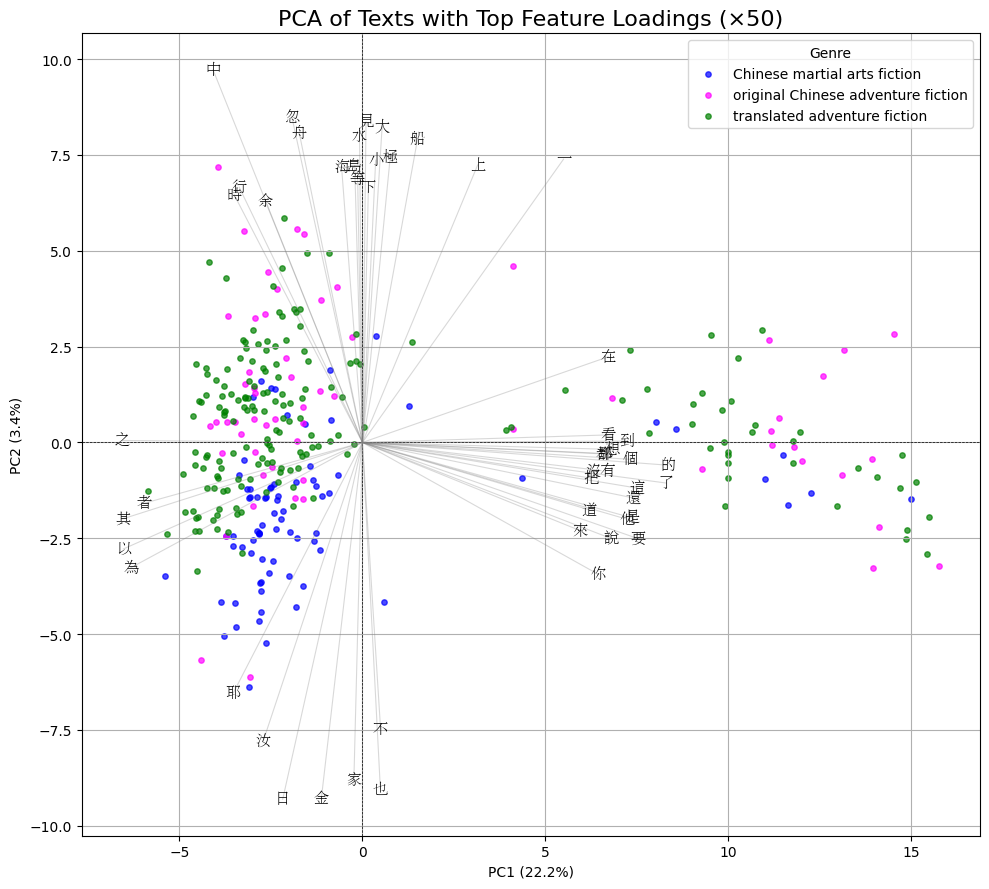

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold



# === Step 2: Genre to color mapping ===
genreColor = {
    'original Chinese adventure fiction': "magenta",
    'translated adventure fiction': "green",
    'Chinese martial arts fiction': "blue"
}
df_meta["color"] = df_meta["folder"].map(genreColor).fillna("gray")

# === Step 3: Standardize selected features ===
X_scaled = StandardScaler().fit_transform(df_reduced)

# === Step 4: Apply PCA ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# === Step 5: Compute loadings ===

# === Step 6: Select top contributors ===
top_pc1 = loadings["PC1"].abs().sort_values(ascending=False).head(25)
top_pc2 = loadings["PC2"].abs().sort_values(ascending=False).head(25)
top_features = top_pc1.index.union(top_pc2.index)
df_top_loadings = loadings.loc[top_features]

# === Step 7: Plot PCA scatter + loadings ===
plt.figure(figsize=(10, 9))

# Plot documents by genre (safe: use boolean mask)
for genre in df_meta["folder"].unique():
    mask = df_meta["folder"] == genre
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        label=genre,
        color=genreColor.get(genre, "gray"),
        alpha=0.7,
        s=15
    )

# Plot axes
plt.axhline(0, color='black', lw=0.5, linestyle='--')
plt.axvline(0, color='black', lw=0.5, linestyle='--')

# Plot loadings: arrows + text
for word, row in df_top_loadings.iterrows():
    x, y = row["PC1"], row["PC2"]
    plt.plot([0, x], [0, y],
         color='gray', alpha=0.3, lw=0.8)

    plt.text(
        x, y, word,
        fontsize=11,
        color='black',
        ha='center',
        va='center',
        fontname='STSong',
        weight='bold'
    )


# Final layout
plt.title("PCA of Texts with Top Feature Loadings (×50)", fontsize=16)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.legend(title="Genre", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig("pca_top100_loadings300_varianceadjusted2.png", dpi=600, bbox_inches='tight')
plt.show()

# Optional: save loadings
df_top_loadings.to_csv("pca_top_loadings_variance_threshold.csv", encoding="utf-8-sig")

In [ ]:
import pandas as pd

# Step 1: Create a DataFrame to hold PC1 and genre info
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"], index=df_meta.index)
df_pca["genre"] = df_meta["folder"]

# Step 2: Count negative and positive PC1 values for each genre
genre_stats = []

for genre, group in df_pca.groupby("genre"):
    num_negative = (group["PC1"] < 0).sum()
    num_positive = (group["PC1"] >= 0).sum()
    ratio = num_positive / num_negative if num_positive != 0 else float('inf')
    genre_stats.append({
        "genre": genre,
        "num_negative": num_negative,
        "num_positive": num_positive,
        "negative_to_positive_ratio": ratio
    })

# Step 3: Convert to DataFrame and display
df_ratio = pd.DataFrame(genre_stats)
print(df_ratio)
